In [113]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [74]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [76]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [77]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [78]:
df.shape

(1338, 7)

In [79]:
# unique values in df
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

**Univariate Analysis**

<Figure size 1200x600 with 0 Axes>

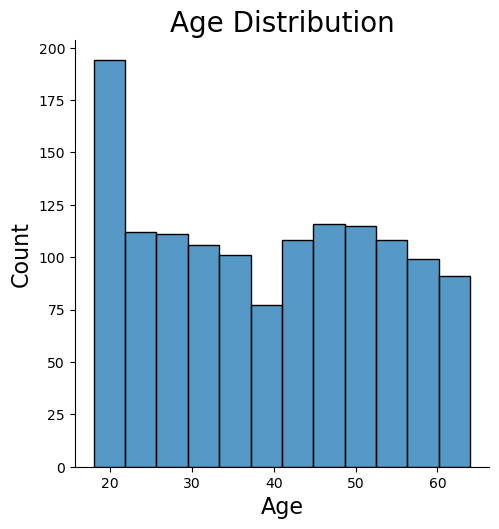

In [80]:
# Age distribution visualization
plt.figure(figsize=(12, 6))
sns.displot(df['age'])
plt.title('Age Distribution', fontsize=20)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Gender Distribution')

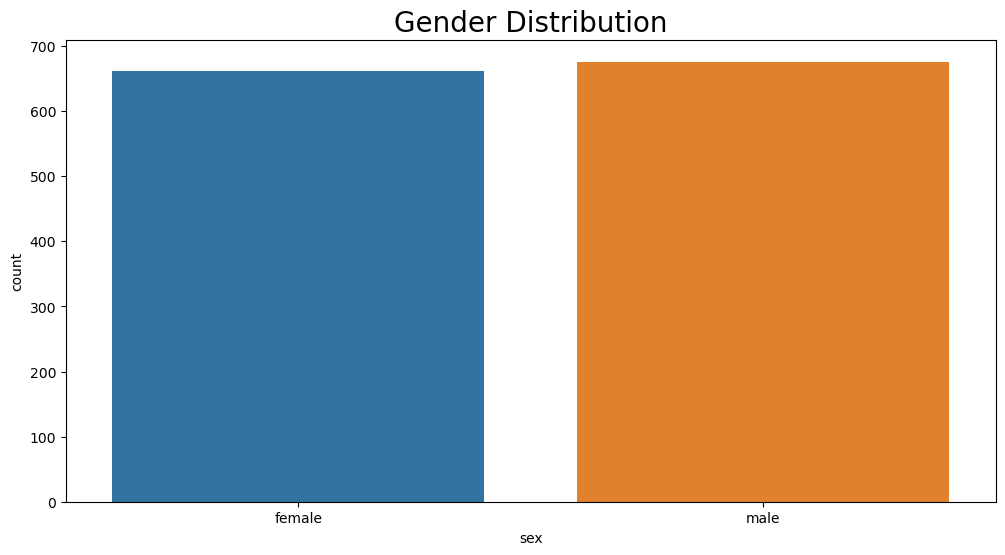

In [81]:
# gender distribution
plt.figure(figsize=(12,6))
sns.countplot(x='sex', data=df)
plt.title("Gender Distribution", fontsize=20)

<Figure size 1200x600 with 0 Axes>

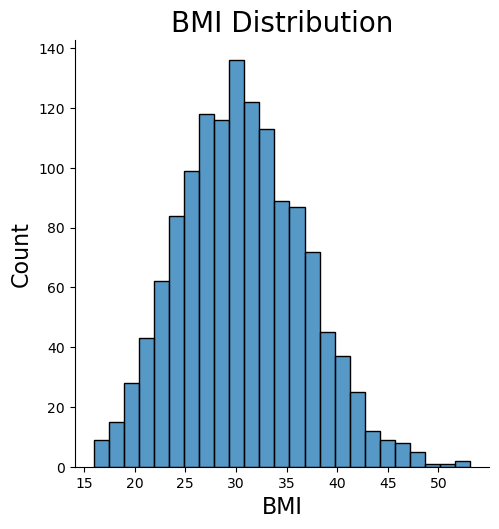

In [82]:
# BMI distribution
plt.figure(figsize=(12,6))
sns.displot(df['bmi'])
plt.title('BMI Distribution', fontsize=20)
plt.xlabel('BMI', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()


Text(0.5, 1.0, 'Children Distribution')

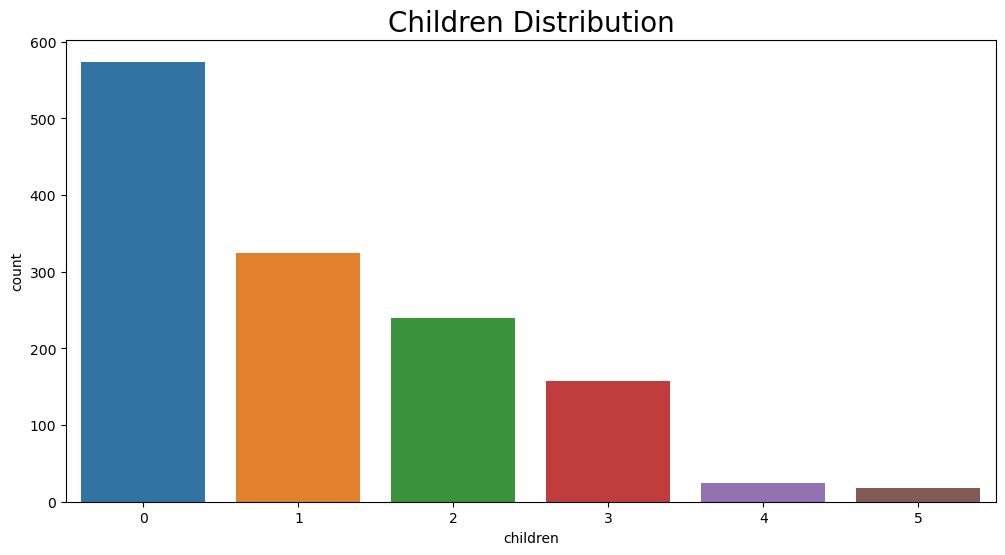

In [83]:
# children distribution
plt.figure(figsize=(12,6))
sns.countplot(x='children', data=df)
plt.title('Children Distribution', fontsize=20)

Text(0.5, 1.0, 'Smoker Distribution')

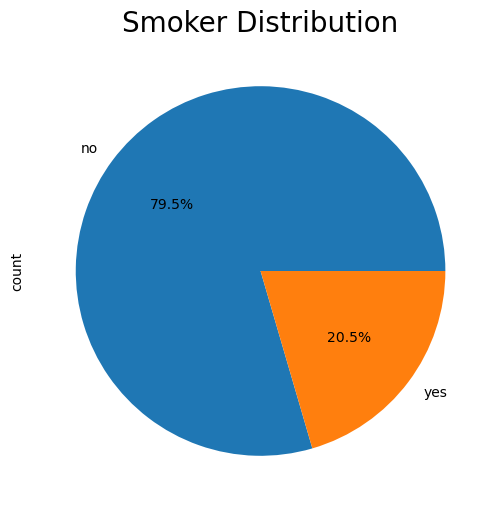

In [84]:
# smoker piechart
plt.figure(figsize=(12,6))
df['smoker'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Smoker Distribution', fontsize=20)


Text(0.5, 1.0, 'Region Distribution')

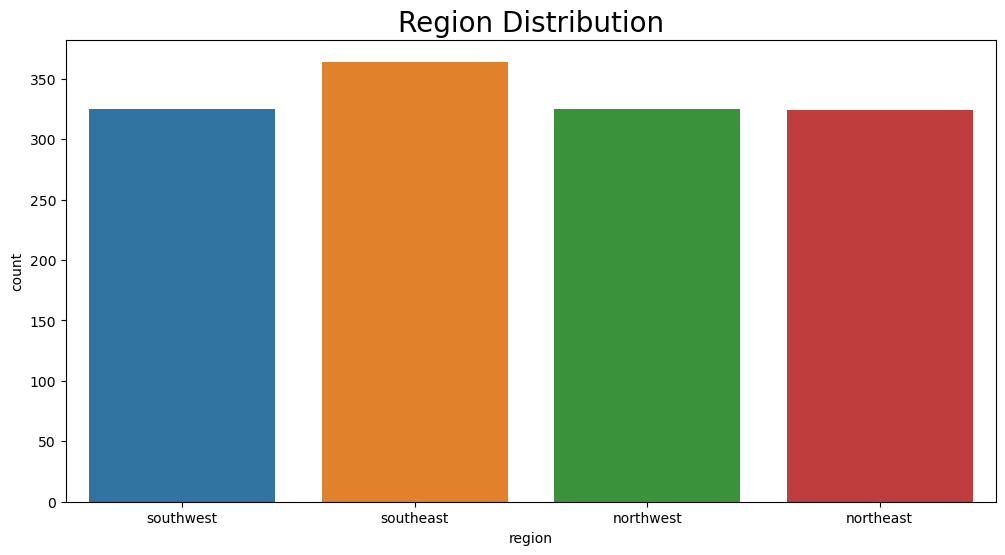

In [85]:
# region distibution
plt.figure(figsize=(12,6))
sns.countplot(x='region', data=df)
plt.title('Region Distribution', fontsize=20)


Text(0.5, 1.0, 'Charges Distribution')

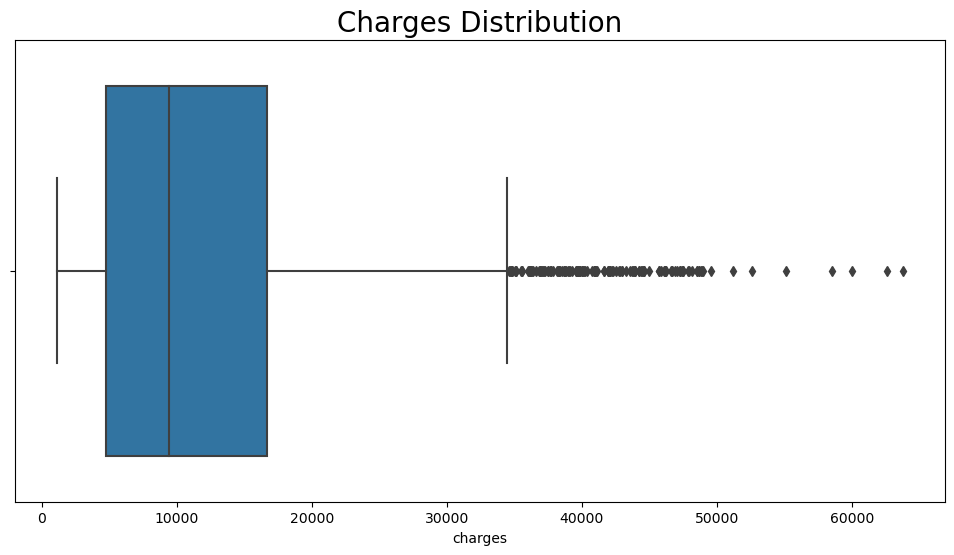

In [86]:
# charges boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x='charges', data=df)
plt.title('Charges Distribution', fontsize=20)


**Bivariate Analysis**

Text(0.5, 1.0, 'Age vs Charges')

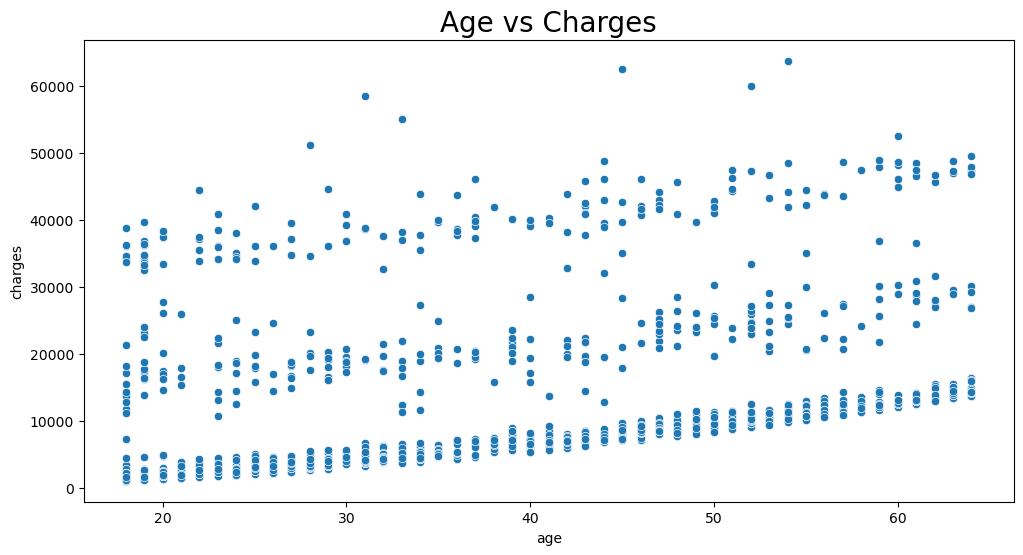

In [87]:
# age vs charges scatter plot
plt.figure(figsize=(12,6))
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Age vs Charges', fontsize=20)


Text(0.5, 1.0, 'BMI vs Charges')

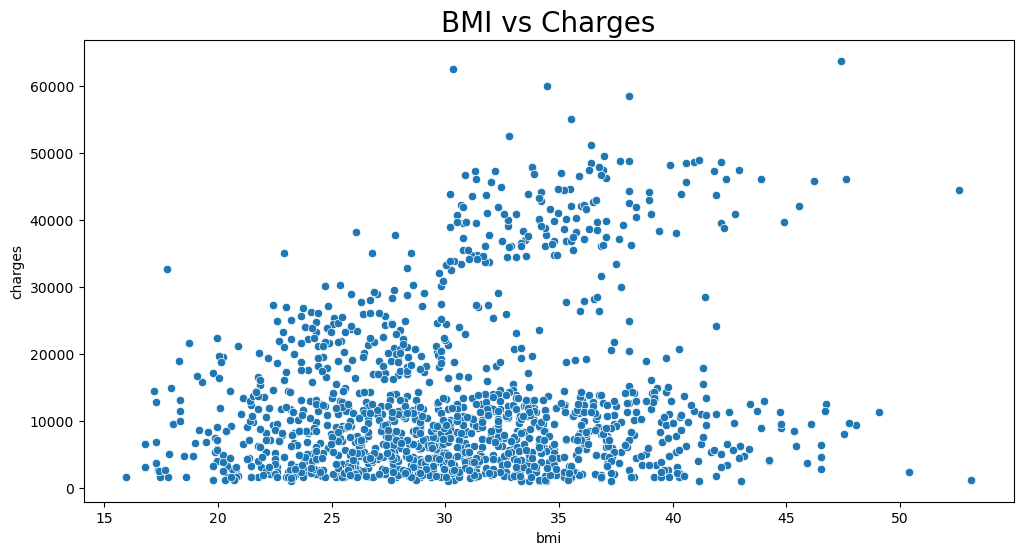

In [88]:
# bmi vs charges scatterplot
plt.figure(figsize=(12,6))
sns.scatterplot(x='bmi',y='charges',data=df)
plt.title('BMI vs Charges', fontsize=20)


Text(0.5, 1.0, 'Gender vs Charges')

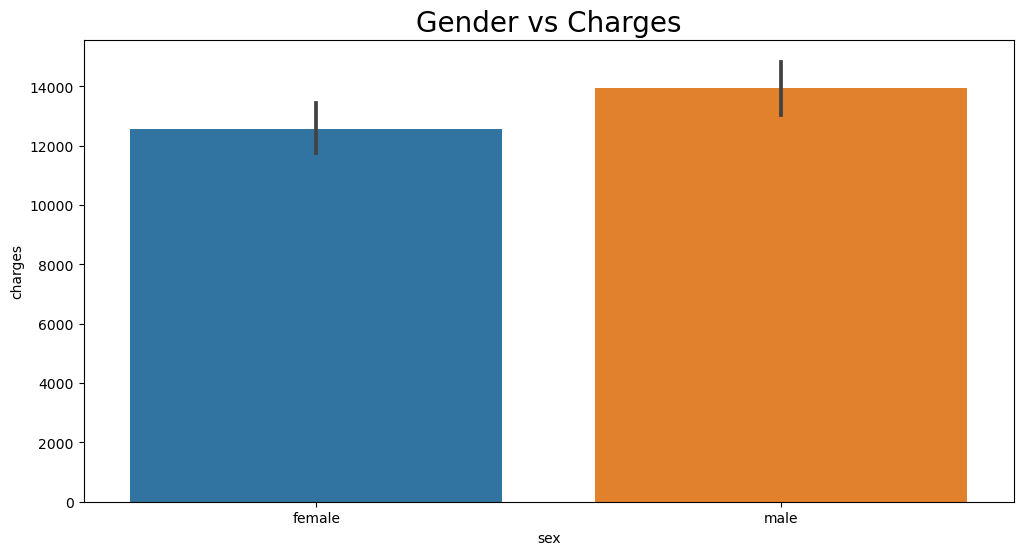

In [89]:
# gender vs charges
plt.figure(figsize=(12,6))
sns.barplot(x='sex',y='charges', data=df)
plt.title('Gender vs Charges', fontsize=20)

Text(0.5, 1.0, 'Smoker vs Charges')

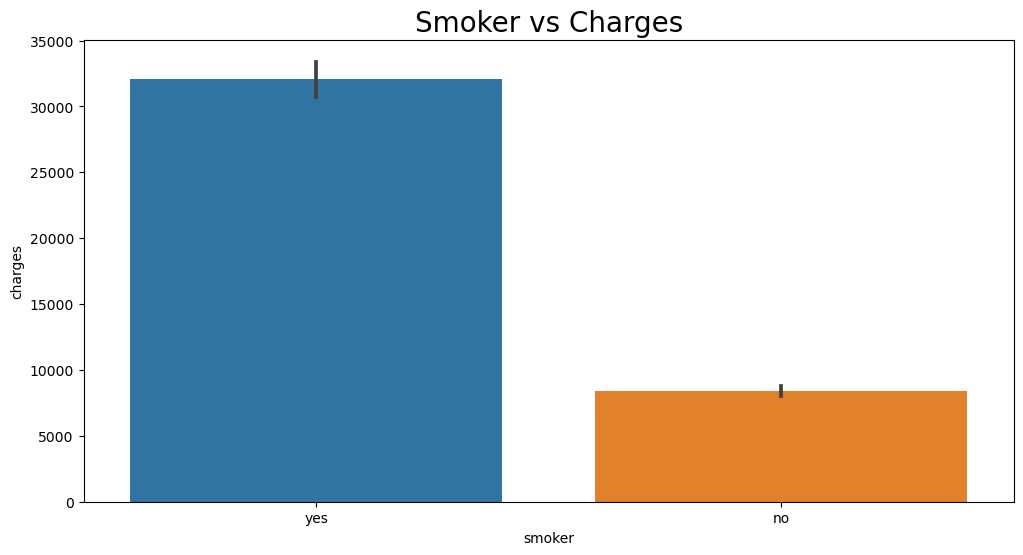

In [90]:
# smoker vs charges
plt.figure(figsize=(12,6))
sns.barplot(x='smoker',y='charges', data=df)
plt.title('Smoker vs Charges', fontsize=20)

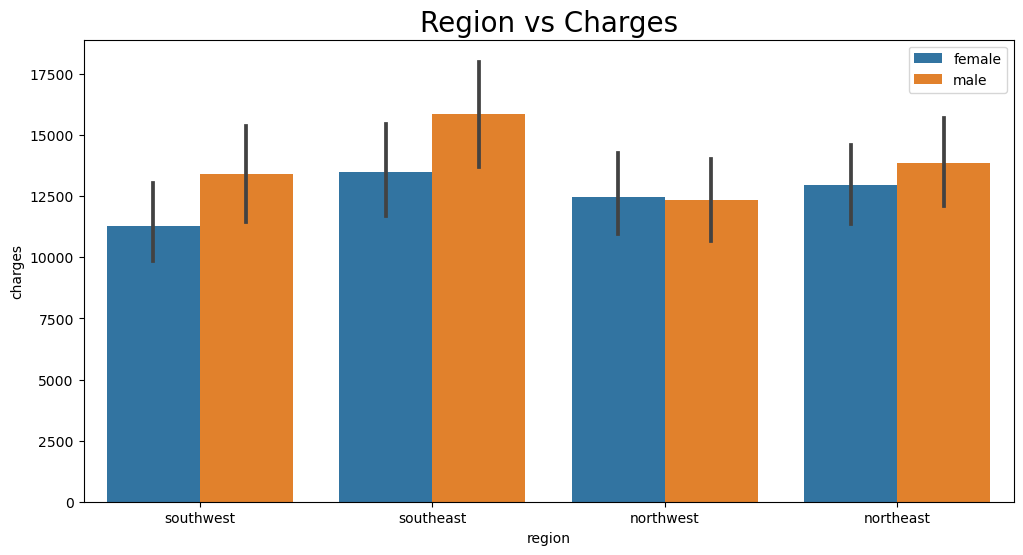

In [91]:
# region vs charges
plt.figure(figsize=(12,6))
sns.barplot(x='region',y='charges', data=df, hue='sex')
plt.title('Region vs Charges', fontsize=20)
plt.legend()

Text(0.5, 1.0, 'Age vs Charges')

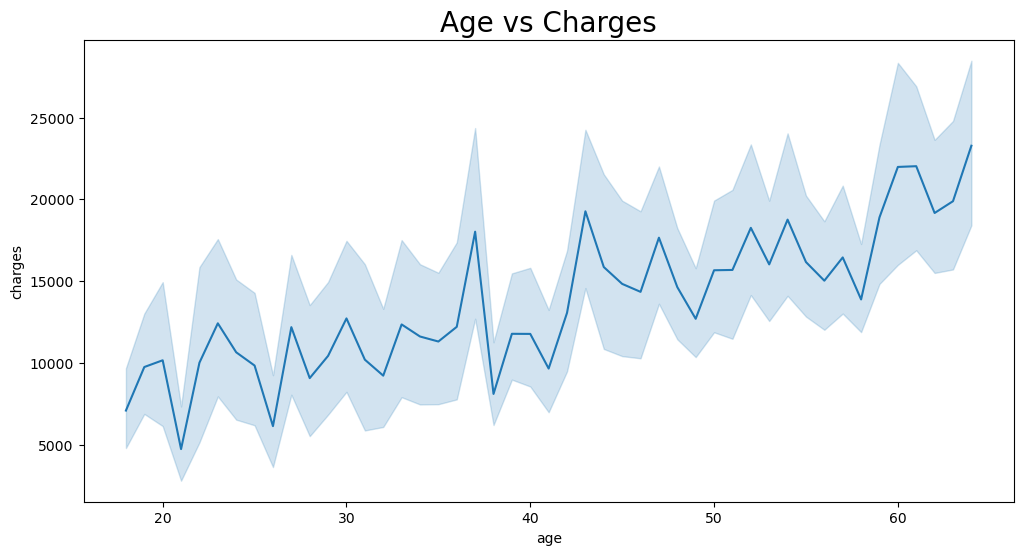

In [92]:
# age vs charges lineplot
plt.figure(figsize=(12,6))
sns.lineplot(x='age',y='charges',data=df)
plt.title('Age vs Charges', fontsize=20)

Text(0.5, 1.0, 'BMI vs Charges')

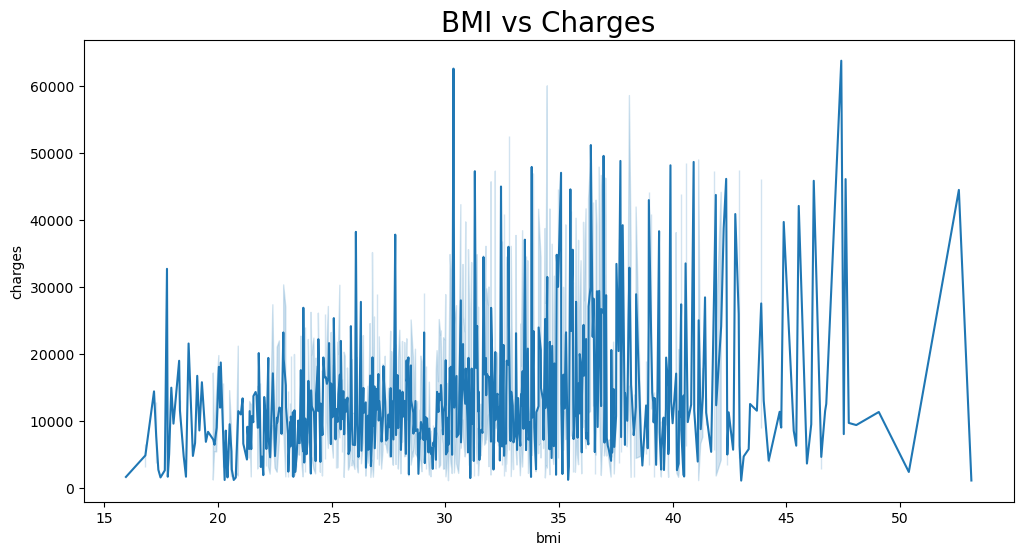

In [93]:
# bmi vs charges lineplot
plt.figure(figsize=(12,6))
sns.lineplot(x='bmi',y='charges',data=df)
plt.title('BMI vs Charges', fontsize=20)

Text(0.5, 1.0, 'Charges Distribution by Gender')

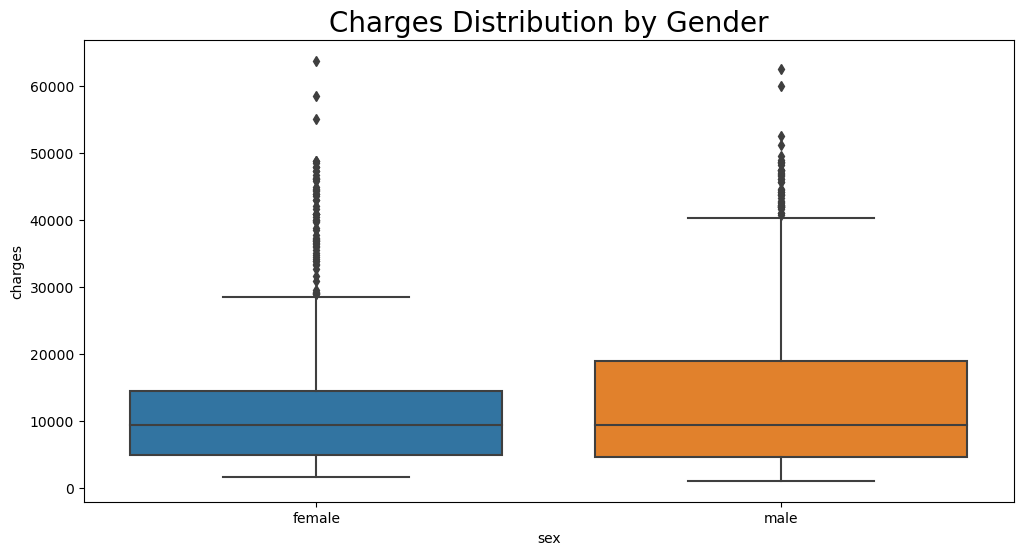

In [94]:
# sex vs charges boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x='sex', y='charges', data=df)  
plt.title('Charges Distribution by Gender', fontsize=20)

Text(0.5, 1.0, 'Charges Distribution by Smoker')

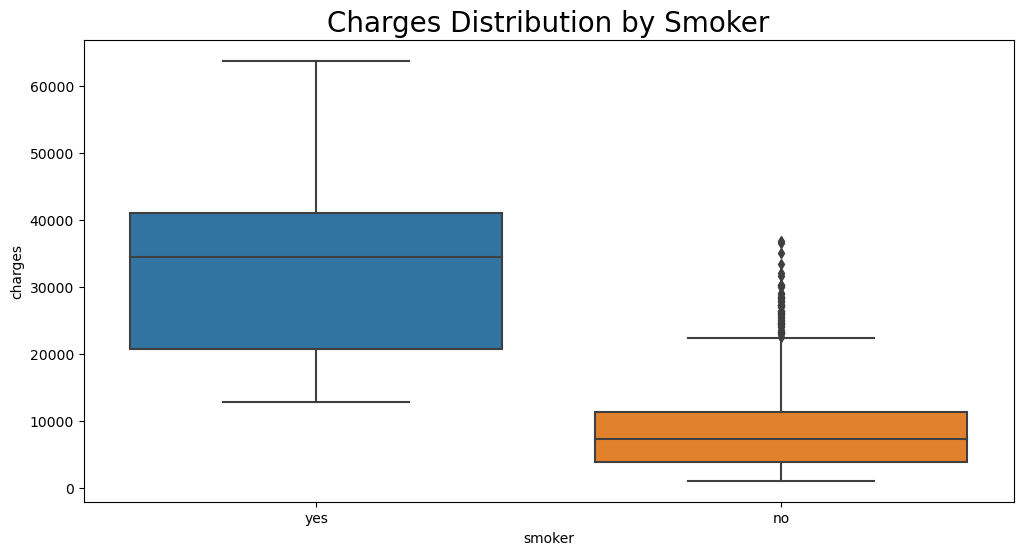

In [95]:
# smoker vs charges boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges Distribution by Smoker', fontsize=20)

Text(0.5, 1.0, 'Charges Distribution by Region')

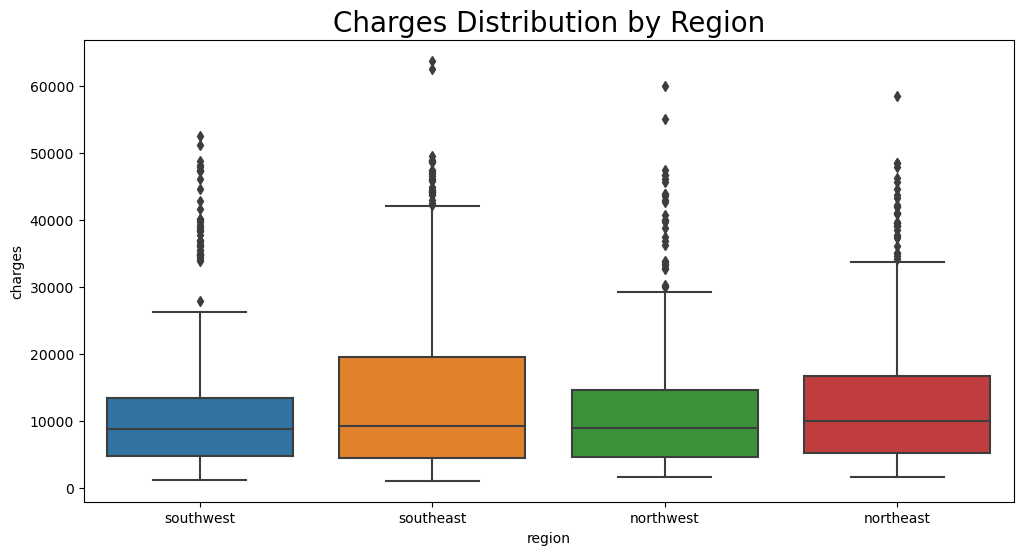

In [96]:
# region vs charges boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Charges Distribution by Region', fontsize=20)

Text(0.5, 1.0, 'Charges Distribution by Gender')

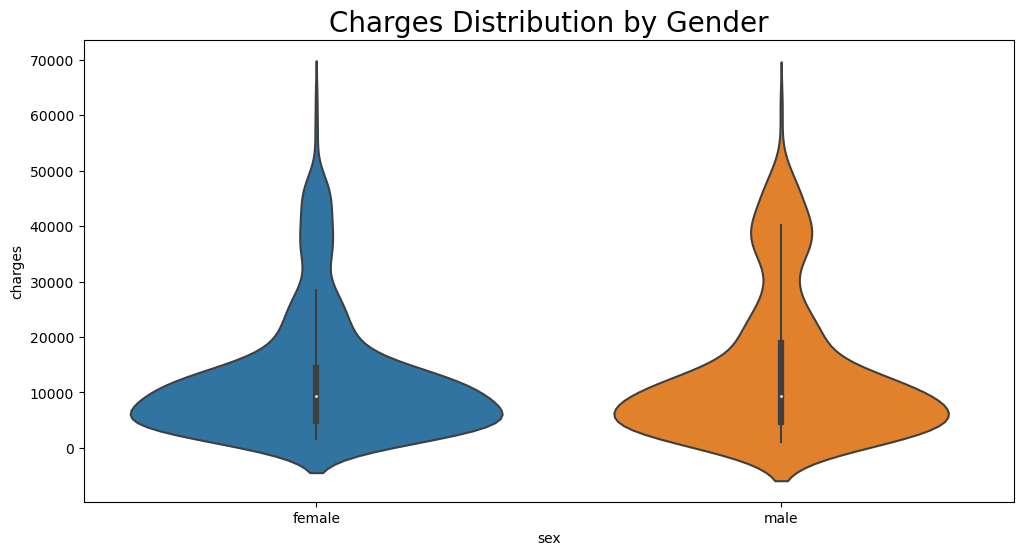

In [97]:
# sex vs charges violin plot
plt.figure(figsize=(12,6))
sns.violinplot(x='sex', y='charges', data=df)
plt.title('Charges Distribution by Gender', fontsize=20)

Text(0.5, 1.0, 'Charges Distribution by Smoker')

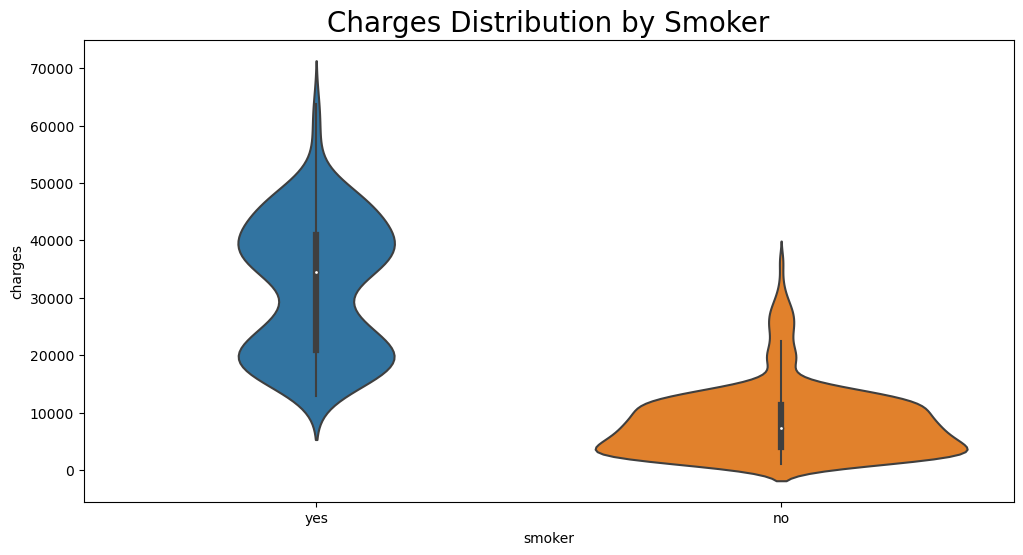

In [98]:
# smoker vs charges violin plot
plt.figure(figsize=(12,6))
sns.violinplot(x='smoker', y='charges', data=df)
plt.title('Charges Distribution by Smoker', fontsize=20)

Text(0.5, 1.0, 'Charges Distribution by Region')

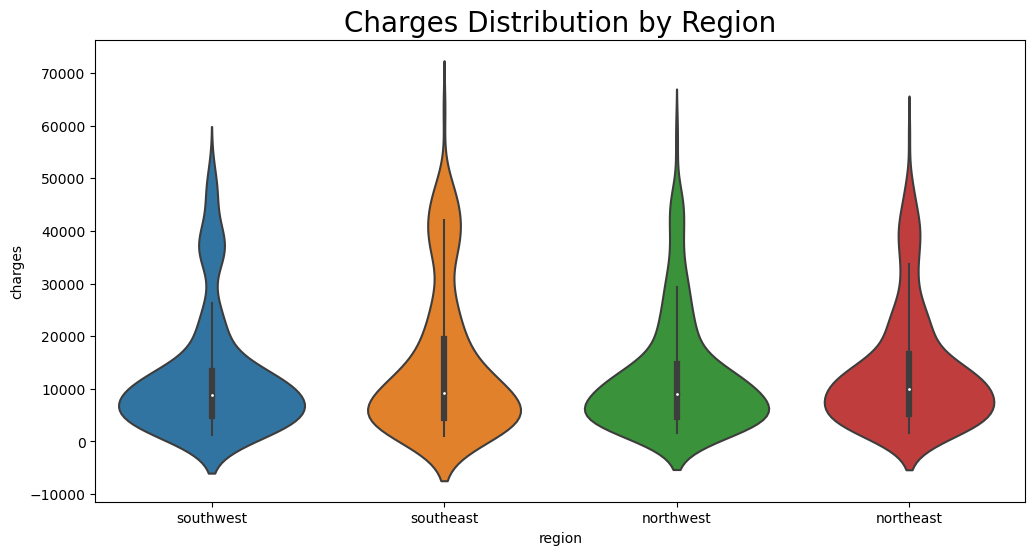

In [99]:
# region vs charges violin plot
plt.figure(figsize=(12,6))
sns.violinplot(x='region', y='charges', data=df)
plt.title('Charges Distribution by Region', fontsize=20)

Text(0.5, 1.0, 'Smoker Distribution by Region')

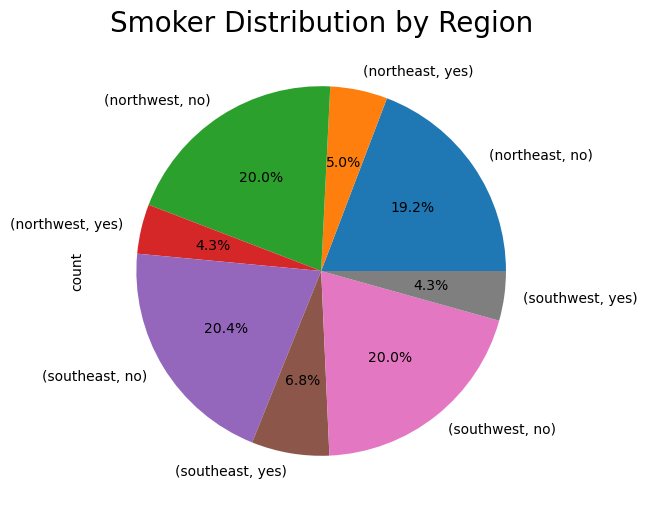

In [100]:
# pie chart of smoker vs no smoker of each region
plt.figure(figsize=(12,6))
df.groupby('region')['smoker'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Smoker Distribution by Region', fontsize=20)


**Multivariate Analysis**

Text(0.5, 1.0, 'Charges Distribution by Region')

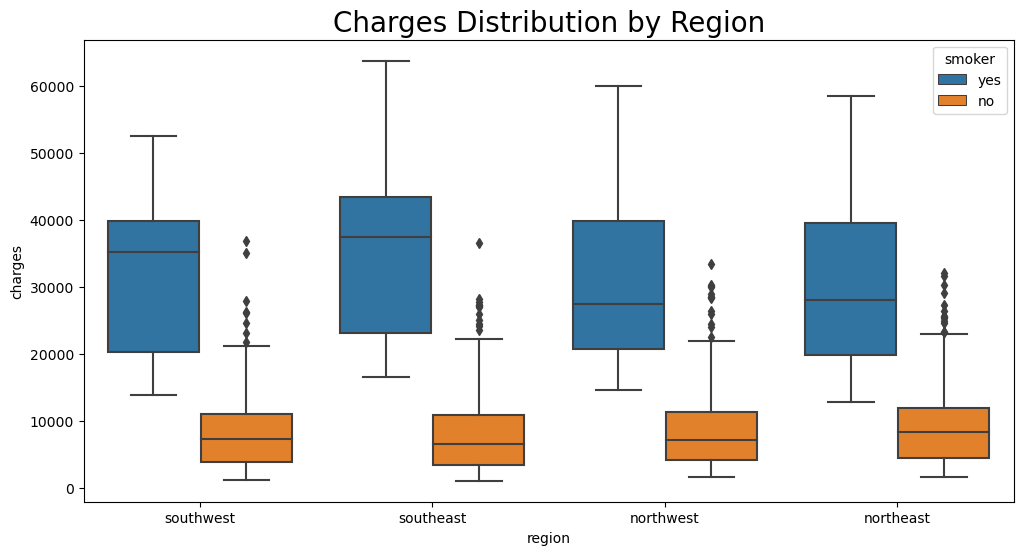

In [101]:
# region vs charges boxplot hue smoker
plt.figure(figsize=(12,6))
sns.boxplot(x='region', y='charges', data=df, hue='smoker')
plt.title('Charges Distribution by Region', fontsize=20)

Text(0.5, 1.0, 'Charges Distribution by Region')

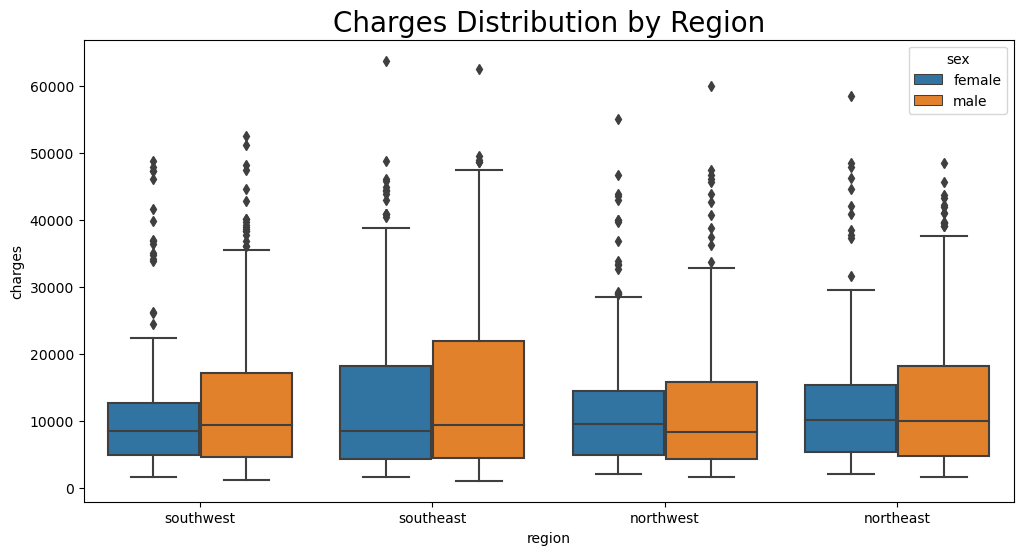

In [102]:
plt.figure(figsize=(12,6))
sns.boxplot(x='region', y='charges', data=df, hue='sex')
plt.title('Charges Distribution by Region', fontsize=20)

In [103]:
# encoding sex and smoker 
# 0 is female and 1 is yes for smoker
# 3 is southwest
# 2 is southeast
# 1 is northwest
# 0 is northeast
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])
df.head()   


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [104]:
# applying standard scaler to age, bmi and charges
scaler = StandardScaler()
df[['age', 'bmi', 'charges']] = scaler.fit_transform(df[['age', 'bmi', 'charges']])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,0,-0.453320,0,1,3,0.298584
1,-1.509965,1,0.509621,1,0,2,-0.953689
2,-0.797954,1,0.383307,3,0,2,-0.728675
3,-0.441948,1,-1.305531,0,0,1,0.719843
4,-0.513149,1,-0.292556,0,0,1,-0.776802


Text(0.5, 1.0, 'Correlation Matrix')

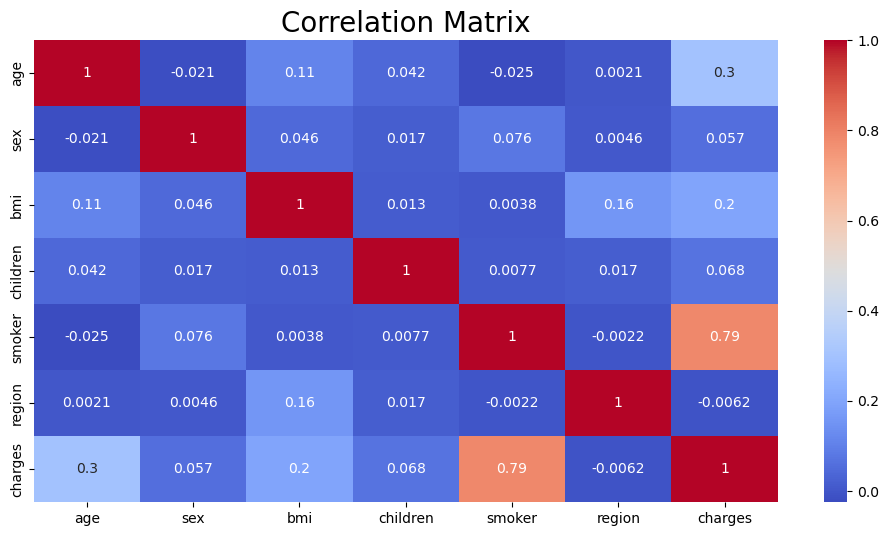

In [105]:
# correalation matrix
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix', fontsize=20)


Text(0.5, 1.0, 'Correlation Matrix with Medical Cost')

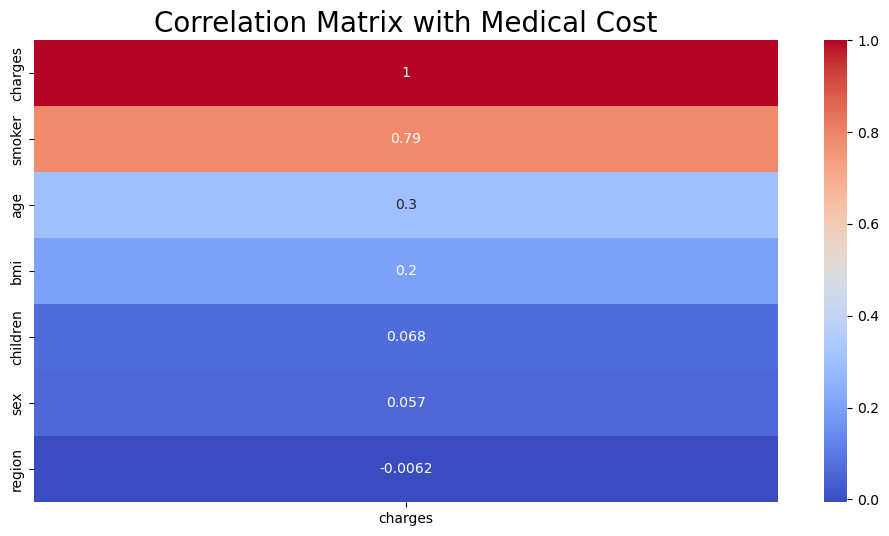

In [106]:
# create a heatmap with charges column
plt.figure(figsize=(12,6))
sns.heatmap(df.corr()[['charges']].sort_values('charges', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Medical Cost', fontsize=20)

In [107]:

X = df.drop(columns='charges', axis=1)
y = df['charges']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [108]:
model = GradientBoostingRegressor()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)


In [109]:

# perform a 10 fold CV
scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')

print("Cross Validation Score", scores)


Cross Validation Score [-0.13039342 -0.13080295 -0.14837353 -0.20541914 -0.15059755 -0.0612431
 -0.12169801 -0.17995556 -0.12369213 -0.16491437]


**Error**

In [110]:
mse = mean_squared_error(y_test,y_predict)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test,y_predict)
r2 = r2_score(y_test, y_predict)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)


Mean Squared Error (MSE): 0.13426320664478664
Mean Absolute Error (MAE): 0.1946852146281445
Root Mean Squared Error (RMSE): 0.36641944086632006
R2 Score: 0.8689892000351176


**Interpret the Results**

***Mean Squared Error (MSE):*** The MSE value of 0.1341 indicates that, on average, the squared difference between the predicted and actual values is relatively small. A lower MSE suggests that the model's predictions are closer to the actual values.

***Mean Absolute Error (MAE):*** The MAE value of 0.1942 represents the average absolute difference between the predicted and actual values. Like MSE, a lower MAE suggests that the model's predictions are closer to the actual values. 

***Root Mean Squared Error (RMSE):*** The RMSE value of 0.3662 is calculated by taking the square root of the MSE, which provides a more interpretable scale. Like MSE, a lower RMSE indicates that the predicted values are closer to the actual values. 

***R2 Score:*** The R2 score of 0.8692 (or 86.92%) measures the proportion of the variance in the target variable that can be explained by the independent variables in the model. An R2 score closer to 1 indicates that the model can explain a higher percentage of the variance, suggesting a good fit. In this case, an R2 score of 0.8692 indicates that the model explains approximately 86.92% of the variance in the target variable.

Overall, the metrics suggest that the model is performing well in terms of prediction accuracy and explaining the variability in the target variable.


**Testing Model**

In [111]:
input_data = (19,0,27.9,0,1,3)

# change the input_data to numpy array to make prediction
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

[3.77471819]


c:\Users\arsal\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
